In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [17]:
import re

In [2]:
df = pd.read_csv('../../data/bird_dataset.csv', index_col=0)
df.head()

C:\Users\whitm\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SpecID,PassNonPass,IOCOrder,BLFamilyLatin,BLFamilyEnglish,BLFamSequID,Taxo,Scientific,English,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,Diet-Seed,Diet-PlantO,Diet-5Cat,Diet-Source,Diet-Certainty,Diet-EnteredBy,ForStrat-watbelowsurf,ForStrat-wataroundsurf,ForStrat-ground,ForStrat-understory,ForStrat-midhigh,ForStrat-canopy,ForStrat-aerial,PelagicSpecialist,ForStrat-Source,ForStrat-SpecLevel,ForStrat-EnteredBy,Nocturnal,BodyMass-Value,BodyMass-Source,BodyMass-SpecLevel,BodyMass-Comment,Record-Comment,Unnamed: 0.1,English name,Family,Global IUCN Red List Category,endemic_breeding,migratory,africa,antarctica,asia,australasia,caribbean,central_amer,central_asia,europe,high_seas,mid_east,north_amer,oceania,south_amer,agriculture_threat,biological_threat,climate_change_threat,energy_mining_threat,geological_threat,human_intrusions_threat,natural_systems_threat,pollution_threat,res_comm_dev_threat,transportation_threat,invasive_threat,artificial_aquatic,artificial_terrestrial,caves_subterranean,desert,forest,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland
1,37.0,Nonpasseriformes,Rheiformes,Rheidae,Rheas,3.0,BL3,Rhea americana,Greater Rhea,20.0,10.0,10.0,0.0,0.0,0.0,20.0,0.0,20.0,20.0,Omnivore,Ref_1,A,Jennifer,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,Ref_1,1.0,Jessica,0.0,23000.00,Dunning08,1.0,NaN,NaN,2.0,Greater Rhea,Rheidae (Rheas),NT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,38.0,Nonpasseriformes,Rheiformes,Rheidae,Rheas,3.0,BL3,Rhea pennata,Lesser Rhea,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,30.0,40.0,PlantSeed,Ref_1,A,Jennifer,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,Ref_1,1.0,Jessica,0.0,23900.00,Dunning08,1.0,NaN,NaN,3.0,Lesser Rhea,Rheidae (Rheas),LC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45.0,Nonpasseriformes,Casuariiformes,Casuariidae,Cassowaries,4.0,BL3,Casuarius casuarius,Southern Cassowary,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,Ref_1,A,Jennifer,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,Ref_1,1.0,Jessica,0.0,44000.00,Dunning08,1.0,NaN,NaN,52.0,Southern Cassowary,"Casuariidae (Cassowaries, Emus)",LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,Nonpasseriformes,Casuariiformes,Casuariidae,Cassowaries,4.0,BL3,Casuarius bennetti,Dwarf Cassowary,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,Ref_1,B,Jennifer,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,Ref_1,1.0,Jessica,0.0,34999.99,Dunning08,1.0,NaN,NaN,53.0,Dwarf Cassowary,"Casuariidae (Cassowaries, Emus)",LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,47.0,Nonpasseriformes,Casuariiformes,Casuariidae,Cassowaries,4.0,BL3,Casuarius unappendiculatus,Northern Cassowary,20.0,0.0,0.0,0.0,10.0,0.0,60.0,0.0,0.0,10.0,FruiNect,Ref_1,A,Jennifer,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,Ref_1,1.0,Jessica,0.0,46073.85,Dunning08,1.0,NaN,NaN,54.0,Northern Cassowary,"Casuariidae (Cassowaries, Emus)",LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 1 to 9985
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SpecID                         9597 non-null   float64
 1   PassNonPass                    9597 non-null   object 
 2   IOCOrder                       9597 non-null   object 
 3   BLFamilyLatin                  9597 non-null   object 
 4   BLFamilyEnglish                9597 non-null   object 
 5   BLFamSequID                    9597 non-null   float64
 6   Taxo                           9597 non-null   object 
 7   Scientific                     9597 non-null   object 
 8   English                        9597 non-null   object 
 9   Diet-Inv                       9597 non-null   float64
 10  Diet-Vend                      9597 non-null   float64
 11  Diet-Vect                      9597 non-null   float64
 12  Diet-Vfish                     9597 non-null   f

In [4]:
df.columns

Index(['SpecID', 'PassNonPass', 'IOCOrder', 'BLFamilyLatin', 'BLFamilyEnglish',
       'BLFamSequID', 'Taxo', 'Scientific', 'English', 'Diet-Inv', 'Diet-Vend',
       'Diet-Vect', 'Diet-Vfish', 'Diet-Vunk', 'Diet-Scav', 'Diet-Fruit',
       'Diet-Nect', 'Diet-Seed', 'Diet-PlantO', 'Diet-5Cat', 'Diet-Source',
       'Diet-Certainty', 'Diet-EnteredBy', 'ForStrat-watbelowsurf',
       'ForStrat-wataroundsurf', 'ForStrat-ground', 'ForStrat-understory',
       'ForStrat-midhigh', 'ForStrat-canopy', 'ForStrat-aerial',
       'PelagicSpecialist', 'ForStrat-Source', 'ForStrat-SpecLevel',
       'ForStrat-EnteredBy', 'Nocturnal', 'BodyMass-Value', 'BodyMass-Source',
       'BodyMass-SpecLevel', 'BodyMass-Comment', 'Record-Comment',
       'Unnamed: 0.1', 'English name', 'Family',
       'Global IUCN Red List Category', 'endemic_breeding', 'migratory',
       'africa', 'antarctica', 'asia', 'australasia', 'caribbean',
       'central_amer', 'central_asia', 'europe', 'high_seas', 'mid_east',
    

In [5]:
# create df with useful columns
drop_cols = ['SpecID','IOCOrder', 'BLFamilyLatin', 'BLFamilyEnglish', 'BLFamSequID', 'Taxo', 'Scientific', 'English',
             'Diet-Source', 'Diet-EnteredBy', 'ForStrat-Source', 'ForStrat-EnteredBy', 'BodyMass-Source',
             'BodyMass-Comment', 'Record-Comment', 'Unnamed: 0.1', 'English name', 'Family']

bird_df = df.drop(columns=drop_cols)
bird_df.head()

,PassNonPass,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,Diet-Seed,Diet-PlantO,Diet-5Cat,Diet-Certainty,ForStrat-watbelowsurf,ForStrat-wataroundsurf,ForStrat-ground,ForStrat-understory,ForStrat-midhigh,ForStrat-canopy,ForStrat-aerial,PelagicSpecialist,ForStrat-SpecLevel,Nocturnal,BodyMass-Value,BodyMass-SpecLevel,Global IUCN Red List Category,endemic_breeding,migratory,africa,antarctica,asia,australasia,caribbean,central_amer,central_asia,europe,high_seas,mid_east,north_amer,oceania,south_amer,agriculture_threat,biological_threat,climate_change_threat,energy_mining_threat,geological_threat,human_intrusions_threat,natural_systems_threat,pollution_threat,res_comm_dev_threat,transportation_threat,invasive_threat,artificial_aquatic,artificial_terrestrial,caves_subterranean,desert,forest,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland
1,Nonpasseriformes,20.0,10.0,10.0,0.0,0.0,0.0,20.0,0.0,20.0,20.0,Omnivore,A,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23000.00,1.0,NT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Nonpasseriformes,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,30.0,40.0,PlantSeed,A,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23900.00,1.0,LC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nonpasseriformes,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,A,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,44000.00,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Nonpasseriformes,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,B,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,34999.99,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,Nonpasseriformes,20.0,0.0,0.0,0.0,10.0,0.0,60.0,0.0,0.0,10.0,FruiNect,A,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,46073.85,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [6]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 1 to 9985
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PassNonPass                    9597 non-null   object 
 1   Diet-Inv                       9597 non-null   float64
 2   Diet-Vend                      9597 non-null   float64
 3   Diet-Vect                      9597 non-null   float64
 4   Diet-Vfish                     9597 non-null   float64
 5   Diet-Vunk                      9597 non-null   float64
 6   Diet-Scav                      9597 non-null   float64
 7   Diet-Fruit                     9597 non-null   float64
 8   Diet-Nect                      9597 non-null   float64
 9   Diet-Seed                      9597 non-null   float64
 10  Diet-PlantO                    9597 non-null   float64
 11  Diet-5Cat                      9597 non-null   object 
 12  Diet-Certainty                 9597 non-null   o

In [7]:
dd_df = bird_df[bird_df['Global IUCN Red List Category'] == 'DD']
dd_df = dd_df.drop(columns='Global IUCN Red List Category')
dd_df.head()

,PassNonPass,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,Diet-Seed,Diet-PlantO,Diet-5Cat,Diet-Certainty,ForStrat-watbelowsurf,ForStrat-wataroundsurf,ForStrat-ground,ForStrat-understory,ForStrat-midhigh,ForStrat-canopy,ForStrat-aerial,PelagicSpecialist,ForStrat-SpecLevel,Nocturnal,BodyMass-Value,BodyMass-SpecLevel,endemic_breeding,migratory,africa,antarctica,asia,australasia,caribbean,central_amer,central_asia,europe,high_seas,mid_east,north_amer,oceania,south_amer,agriculture_threat,biological_threat,climate_change_threat,energy_mining_threat,geological_threat,human_intrusions_threat,natural_systems_threat,pollution_threat,res_comm_dev_threat,transportation_threat,invasive_threat,artificial_aquatic,artificial_terrestrial,caves_subterranean,desert,forest,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland
492,Nonpasseriformes,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,10.0,Omnivore,D1,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.39,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1101,Nonpasseriformes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Invertebrate,A,0.0,0.0,70.0,20.0,10.0,0.0,0.0,0.0,1.0,0.0,50.15,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1629,Nonpasseriformes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Invertebrate,B,0.0,0.0,0.0,0.0,10.0,0.0,90.0,0.0,1.0,0.0,22.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1630,Nonpasseriformes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Invertebrate,D1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1.0,0.0,39.50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1651,Nonpasseriformes,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Invertebrate,D1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1.0,0.0,14.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
dd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 492 to 9535
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassNonPass                41 non-null     object 
 1   Diet-Inv                   41 non-null     float64
 2   Diet-Vend                  41 non-null     float64
 3   Diet-Vect                  41 non-null     float64
 4   Diet-Vfish                 41 non-null     float64
 5   Diet-Vunk                  41 non-null     float64
 6   Diet-Scav                  41 non-null     float64
 7   Diet-Fruit                 41 non-null     float64
 8   Diet-Nect                  41 non-null     float64
 9   Diet-Seed                  41 non-null     float64
 10  Diet-PlantO                41 non-null     float64
 11  Diet-5Cat                  41 non-null     object 
 12  Diet-Certainty             41 non-null     object 
 13  ForStrat-watbelowsurf      41 non-null     float

In [9]:
bird_df = bird_df.drop(index=dd_df.index)
bird_df['threatened'] = [0.0 if x in ['NT', 'LC'] else 1.0 for x in bird_df['Global IUCN Red List Category']]
bird_df.head()

,PassNonPass,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,Diet-Seed,Diet-PlantO,Diet-5Cat,Diet-Certainty,ForStrat-watbelowsurf,ForStrat-wataroundsurf,ForStrat-ground,ForStrat-understory,ForStrat-midhigh,ForStrat-canopy,ForStrat-aerial,PelagicSpecialist,ForStrat-SpecLevel,Nocturnal,BodyMass-Value,BodyMass-SpecLevel,Global IUCN Red List Category,endemic_breeding,migratory,africa,antarctica,asia,australasia,caribbean,central_amer,central_asia,europe,high_seas,mid_east,north_amer,oceania,south_amer,agriculture_threat,biological_threat,climate_change_threat,energy_mining_threat,geological_threat,human_intrusions_threat,natural_systems_threat,pollution_threat,res_comm_dev_threat,transportation_threat,invasive_threat,artificial_aquatic,artificial_terrestrial,caves_subterranean,desert,forest,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland,threatened
1,Nonpasseriformes,20.0,10.0,10.0,0.0,0.0,0.0,20.0,0.0,20.0,20.0,Omnivore,A,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23000.00,1.0,NT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,Nonpasseriformes,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,30.0,40.0,PlantSeed,A,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23900.00,1.0,LC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nonpasseriformes,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,A,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,44000.00,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Nonpasseriformes,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0,FruiNect,B,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,34999.99,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,Nonpasseriformes,20.0,0.0,0.0,0.0,10.0,0.0,60.0,0.0,0.0,10.0,FruiNect,A,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,46073.85,1.0,LC,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [13]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9556 entries, 1 to 9985
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PassNonPass                    9556 non-null   object 
 1   Diet-Inv                       9556 non-null   float64
 2   Diet-Vend                      9556 non-null   float64
 3   Diet-Vect                      9556 non-null   float64
 4   Diet-Vfish                     9556 non-null   float64
 5   Diet-Vunk                      9556 non-null   float64
 6   Diet-Scav                      9556 non-null   float64
 7   Diet-Fruit                     9556 non-null   float64
 8   Diet-Nect                      9556 non-null   float64
 9   Diet-Seed                      9556 non-null   float64
 10  Diet-PlantO                    9556 non-null   float64
 11  Diet-5Cat                      9556 non-null   object 
 12  Diet-Certainty                 9556 non-null   o

In [10]:
bird_df['threatened'].value_counts()

0.0    8307
1.0    1249
Name: threatened, dtype: int64

In [11]:
X = bird_df.drop(columns=['Global IUCN Red List Category', 'threatened'])
y = bird_df['threatened']

# split into a 10% holdout set
X_t, X_hold, y_t, y_hold = train_test_split(X, y, random_state=42, stratify=y, test_size=0.1)

# split into 75% train, 15% test sets
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, random_state=42, stratify=y_t, test_size=15/90)

## Preprocessing Pipeline

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [24]:
# single numeric column for min max scaling
num_col = ['BodyMass-Value']

# numeric pipeline
num_pipe = Pipeline([('min_max', MinMaxScaler())])


# ForStrat columns
strats = [c for c in df.columns if re.search('ForStrat.+', c)]
strats = strats[:7]

# Diet columns
diets = [c for c in df.columns if re.search('Diet.+', c)]
diets = diets[:10]

# proportional numeric columns
prop_cols = strats + diets

# proportional numeric pipeline
prop_pipe = Pipeline([('div100', FunctionTransformer(lambda x: x/100))])


# categorical columns for OHE
cat_cols = [c for c in X_train.columns if X_train[c].dtype == 'object']

# categorical pipeline
cat_pipe = Pipeline([('ohe', OneHotEncoder())])

In [47]:
# preprocessing pipeline
preprocessor = ColumnTransformer([('numerical', num_pipe, num_col),
                             ('proportional', prop_pipe, prop_cols),
                             ('categorical', cat_pipe, cat_cols)])

## Modeling

In [66]:
# decision tree
dt_pipe = Pipeline([('preprocessor', preprocessor),
                   ('dt', DecisionTreeClassifier())])

# decision tree param grid
dt_grid = {'dt__max_depth': [3, 50, 100],
          'dt__min_samples_split': [2, 5, 10],
          'dt__criterion': ['gini', 'entropy']}

scoring_metrics = ['recall', 'f1']

dt_gs = GridSearchCV(estimator=dt_pipe, param_grid=dt_grid, scoring=scoring_metrics, refit='recall')

In [67]:
dt_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('min_max',
                                                                                          MinMaxScaler())]),
                                                                         ['BodyMass-Value']),
                                                                        ('proportional',
                                                                         Pipeline(steps=[('div100',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x000001F2C5358E50>))]),
                                                                         ['ForStrat-watbelowsurf',
                                                                          'ForStrat-wataroundsurf',
    

In [68]:
pd.DataFrame(dt_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,param_dt__min_samples_split,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.032523,0.009078,0.010774,0.002399,gini,3,2,"{'dt__criterion': 'gini', 'dt__max_depth': 3, ...",0.063830,0.053191,0.010695,0.037433,0.005348,0.034099,0.022952,14,0.113744,0.092166,0.020942,0.067633,0.010417,0.060980,0.039901,14
1,0.023736,0.002985,0.010178,0.002995,gini,3,5,"{'dt__criterion': 'gini', 'dt__max_depth': 3, ...",0.063830,0.053191,0.010695,0.037433,0.005348,0.034099,0.022952,14,0.113744,0.092166,0.020942,0.067633,0.010417,0.060980,0.039901,14
2,0.026532,0.004735,0.010151,0.002458,gini,3,10,"{'dt__criterion': 'gini', 'dt__max_depth': 3, ...",0.069149,0.053191,0.010695,0.037433,0.005348,0.035163,0.024384,13,0.122642,0.092166,0.020942,0.067633,0.010417,0.062760,0.042339,13
3,0.051230,0.002653,0.009786,0.000732,gini,50,2,"{'dt__criterion': 'gini', 'dt__max_depth': 50,...",0.244681,0.239362,0.213904,0.208556,0.262032,0.233707,0.019897,1,0.231738,0.231362,0.207254,0.216066,0.248731,0.227030,0.014305,2
4,0.048917,0.005737,0.011970,0.001896,gini,50,5,"{'dt__criterion': 'gini', 'dt__max_depth': 50,...",0.212766,0.255319,0.203209,0.171123,0.224599,0.213403,0.027475,5,0.220994,0.266667,0.208791,0.194529,0.230769,0.224350,0.024391,4
5,0.046389,0.002066,0.013743,0.002678,gini,50,10,"{'dt__criterion': 'gini', 'dt__max_depth': 50,...",0.143617,0.218085,0.176471,0.171123,0.187166,0.179292,0.024142,11,0.171429,0.250000,0.201220,0.193353,0.218750,0.206950,0.026352,11
6,0.048884,0.002944,0.011756,0.003299,gini,100,2,"{'dt__criterion': 'gini', 'dt__max_depth': 100...",0.212766,0.239362,0.224599,0.219251,0.267380,0.232672,0.019447,2,0.206718,0.233161,0.211587,0.223433,0.257732,0.226526,0.018127,3
7,0.045690,0.001477,0.012549,0.004736,gini,100,5,"{'dt__criterion': 'gini', 'dt__max_depth': 100...",0.218085,0.255319,0.203209,0.181818,0.229947,0.217676,0.024750,4,0.227147,0.265193,0.209366,0.201183,0.239554,0.228489,0.022728,1
8,0.046882,0.002274,0.011763,0.002987,gini,100,10,"{'dt__criterion': 'gini', 'dt__max_depth': 100...",0.143617,0.212766,0.181818,0.160428,0.176471,0.175020,0.023118,12,0.169811,0.242424,0.206061,0.183486,0.208861,0.202129,0.024805,12
9,0.026561,0.004910,0.008362,0.000471,entropy,3,2,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.000000,0.000000,0.010695,0.016043,0.005348,0.006417,0.006236,16,0.000000,0.000000,0.020942,0.030769,0.010417,0.012426,0.012015,16


In [69]:
dt_gs.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 50, 'dt__min_samples_split': 2}

In [78]:
from sklearn.metrics import recall_score, f1_score, RocCurveDisplay, plot_confusion_matrix

0.20320855614973263
0.20485175202156336


AttributeError: type object 'RocCurveDisplay' has no attribute 'from_estimator'

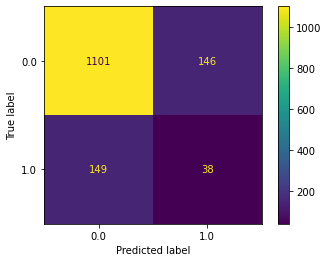

In [72]:
y_preds = dt_gs.predict(X_test)

print(recall_score(y_test, y_preds))
print(f1_score(y_test, y_preds))

plot_confusion_matrix(dt_gs, X_test, y_test)
RocCurveDisplay.from_estimator(dt_gs, X_test, y_test)